**Name** - Sakshee Phade<br>
**Roll No** - 43244<br>
**Batch** - R10<br>
**Problem** **Statement** - This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of customers. A. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. B. Perform data-preparation( Train-Test Split) C. Apply Machine Learning Algorithm D. Evaluate Model. E. Apply Cross-Validation and Evaluate Model

In [1]:
import numpy as np
import pandas as pd

#Annual income spending score

print("K-means clustering on mall customers dataset")
df = pd.read_csv("Mall_Customers.csv") ##read dataset
print(df[0:5]) ##print head of the dataset

K-means clustering on mall customers dataset
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Plotting data for observation

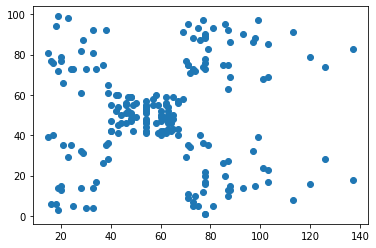

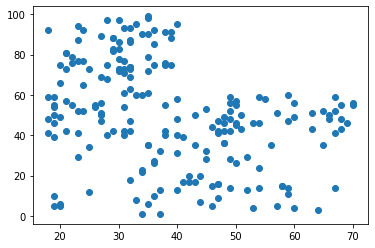

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##Data visualization for 2 different parameters for kmeans consideration
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.show()


   Annual Income (k$)  Spending Score (1-100)
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
   Age  Spending Score (1-100)
1   21                      81
2   20                       6
3   23                      77
4   31                      40
[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


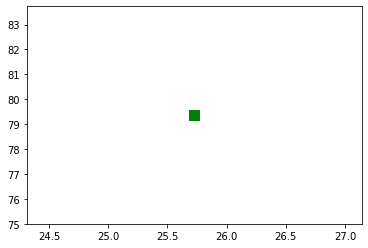

In [7]:
x = df.iloc[:,3:5] # 1t for rows and second for columns
x

print(x[1:5])

x2 = df[['Age', 'Spending Score (1-100)']].copy()
x2

print(x2[1:5])

kmeans = KMeans(5)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

print(kmeans.cluster_centers_)


kmeans2 = KMeans(5)
kmeans2.fit(x2)

identified_clusters2 = kmeans2.fit_predict(x2)
identified_clusters2


Plot the clusters

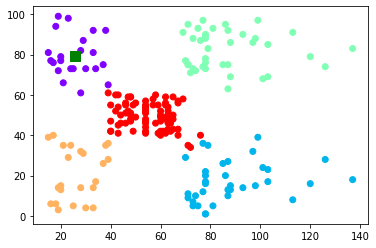

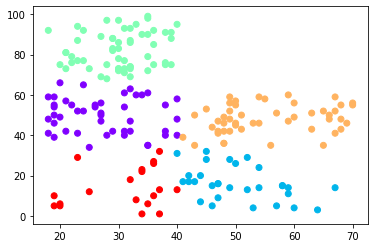

In [8]:
##Create clustered sets

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Annual Income (k$)'],data_with_clusters['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')

plt.scatter(25.72727273, 79.36363636, s=100, c='g', marker='s')
plt.show()



data_with_clusters2 = df.copy()
data_with_clusters2['Clusters'] = identified_clusters2
plt.scatter(data_with_clusters2['Age'],data_with_clusters2['Spending Score (1-100)'],c=data_with_clusters2['Clusters'],cmap='rainbow')
plt.show()

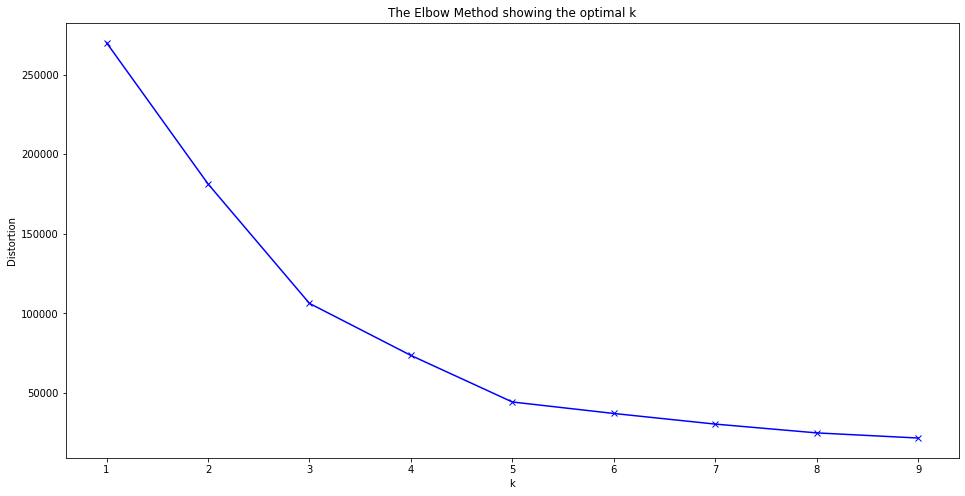

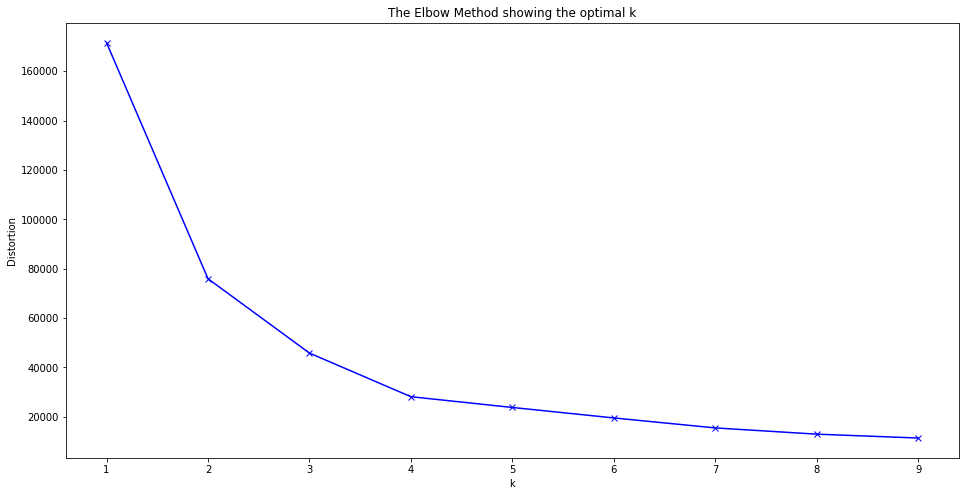

In [5]:
##Elbow method

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()